# Solución al problema de damas

### Definicion Formal

* **Estado inicial:** Situación del entorno desde el cual comienza el juego. En el caso de las damas, el estado inicial es el tablero con las 12 fichas de cada bando en sus posiciones respectivas.

* **Jugador(s):** Define cuál jugador tiene el turno en el estado `s`, el cual puede ser `blancas` o `negras`.

* **Posibles acciones(s):** Descripción de las posibles acciones del Jugador(`s`), dado un estado `s`. En este caso, poner o bien una dama `blanca` o bien una `negra` en una casilla vacía.

* **Función de transiciones(s, a):** Descripción del entorno que resulta de la ejecución de la acción `a` por el `Jugador(s)` en el estado `s`. Junto con el estado inicial y las posibles acciones, la función de transiciones define el espacio de estados del juego.

* **Prueba de objetivo(s):** Permite determinar si el juego se termina cuando se obtiene el estado `s`. 

* **Función de utilidad(s):** Definida sólo para aquellos estados `s` en los cuales el juego se termina. Esta función establece la utilidad en `s`. En nuestro caso del triqui, asumiremos que si el ganador es el jugador de las $O$, la utilidad es -1; si el ganador es el jugador de las $X$, la utilidad es 1; y en caso de empate la utilidad es 0.

### Implementacion

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
from random import choice
import copy

%matplotlib inline

In [127]:
class damas:
    
    def __init__(self):
        self.estado = None# matriz 8x8
        self.blancas = []# # lista de posiciones (x,y) de fichas blancas
        self.negras = []# # lista de posiciones (x,y) de fichas blancas
        self.turno = 2 # primero comienzan blancas
        self.reinas_blancas= [] # #reinas son figuras que coronan hasta la última linea
        self.reinas_negras= [] #  #reinas son figuras que coronan hasta la última linea
    
    def estado_inicial(self):
        return np.matrix([[0]*8]*8)
    
    def pintar_estado(self, estado):
        # Dibuja el tablero correspondiente al estado
        # Input: estado, que es una 3-lista de 3-listas
        fig, axes = plt.subplots(figsize=(9,8))

        # Dibujo el tablero
        step = 1./8
        offset = 0.001
        tangulos = []

        # Borde del tablero
        tangulos.append(patches.Rectangle((0,0),0.998,0.998,\
                                          facecolor='cornsilk',\
                                         edgecolor='black',\
                                         linewidth=2))

        # Creo las líneas del tablero
        for j in range(8):
            locacion = j * step
            # Crea linea horizontal en el rectangulo
            tangulos.append(patches.Rectangle(*[(0, locacion), 1, 0.008],\
                    facecolor='black'))
            # Crea linea vertical en el rectangulo
            tangulos.append(patches.Rectangle(*[(locacion, 0), 0.008, 1],\
                    facecolor='black'))

        for t in tangulos:
            axes.add_patch(t)

        # Cargando imagen de O
        arr_img_O = plt.imread("./imagenes/negra.png", format='png')
        image_O = OffsetImage(arr_img_O, zoom=0.07)
        image_O.image.axes = axes

        # Cargando imagen de X
        arr_img_X = plt.imread("./imagenes/blanca.png", format='png')
        image_X = OffsetImage(arr_img_X, zoom=0.07)
        image_X.image.axes = axes

        offsetX = 0.065
        offsetY = 0.065

        # ASUMO QUE LAS 'blancas' SE REPRESENTAN CON 1 EN LA MATRIZ
        # Y QUE LAS 'negras' SE REPRESENTAN CON 2
        for i in range(8):
            for j in range(8):
                if estado[j, i] == 1:
                    # print("O en (" + str(i) + ", " + str(j) + ")")
                    Y = 7 - j
                    X = i
                    # print("(" + str(X) + ", " + str(Y) + ")")
                    ab = AnnotationBbox(
                        image_O, 
                        [(X*step) + offsetX, (Y*step) + offsetY], 
                        frameon=False)
                    axes.add_artist(ab)
                if estado[j, i] == 2:
                    # print("X en (" + str(i) + ", " + str(j) + ")")
                    Y = 7 - j
                    X = i
                    # print("(" + str(X) + ", " + str(Y) + ")")
                    ab = AnnotationBbox(
                        image_X, 
                        [(X*step) + offsetX, (Y*step) + offsetY], 
                        frameon=False)
                    axes.add_artist(ab)
        
        axes.axis('off')
        return axes
    
    def jugador(self, estado):
        # Devuelve el número del jugador a quien corresponde el turno
        # 1 para las 'negras'
        # 2 para las 'blancas'
        num_Os = np.count_nonzero(estado==1)
        num_Xs = np.count_nonzero(estado==2)
        # print("Cantidad O:", num_Os, " Cantidad X:", num_Xs)
        if num_Os < num_Xs:
            return 1
        else:
            return 2
    
    
##################################################### ACCIONES APLICABLES ######################################################

    def acciones_aplicables(self, estado):
        # Devuelve una lista de parejas que representan las casillas vacías
        # Input: estado, que es una np.matrix(8x8)
        # Output: dictionario de movimientos de cada ficha del turno del jugador
        movimientos={}
        if self.turno == 1: # si juegan las 'negras'
            ## NORMALES NEGRAS
            for posicion in self.negras: #mirando los posibles movimientos de las negras
                pos_x = posicion[0]
                pos_y = posicion[1]
                #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                if pos_x>=1 and pos_y>=1:
                    if estado[pos_y-1,pos_x-1]==0: #⬉
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
                if pos_x<=6 and pos_y>=1:
                    if estado[pos_y-1,pos_x+1]==0:#⬈
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y-1))
            ## DAMAS NEGRAS ⚠️ No sabemos si existen errores todavia en esta parte del codigo
            if self.reinas_negras != None:
                for posicion in self.reinas_negras: #mirando los posibles movimientos de las negras
                    pos_x = posicion[0]
                    pos_y = posicion[1]
                    #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                    if pos_x>=1 and pos_y>=1:
                        if estado[pos_y-1,pos_x-1]==0: #⬉
                            movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
                    if pos_x<=6 and pos_y>=1:
                        if estado[pos_y-1,pos_x+1]==0:#⬈
                            movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y-1))
                    if pos_x<=6 and pos_y<=6:
                        if estado[pos_y+1,pos_x+1]==0 :#⬊
                            movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y+1))
                    if pos_x>=1 and pos_y<=6:
                        if estado[pos_y+1,pos_x-1]==0 :#⬋
                            movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y+1))  
                            
        
        
        if self.turno == 2: # si juegan las 'blancas'
            ## NORMALES BLANCAS
            for posicion in self.blancas: #mirando los posibles movimientos de las blancas
                pos_x = posicion[0]
                pos_y = posicion[1]
                #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                if pos_x<=6 and pos_y<=6:
                    if estado[pos_y+1,pos_x+1]==0 :#⬊
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y+1))
                if pos_x>=1 and pos_y<=6:
                    if estado[pos_y+1,pos_x-1]==0 :#⬋
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y+1))   
            ## DAMAS BLANCAS ⚠️ No sabemos si existen errores todavia en esta parte del codigo
            if self.reinas_blancas != None:
                for posicion in self.reinas_blancas: #mirando los posibles movimientos de las negras
                    pos_x = posicion[0]
                    pos_y = posicion[1]
                    #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                    if pos_x>=1 and pos_y>=1:
                        if estado[pos_y-1,pos_x-1]==0: #⬉
                            movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
                    if pos_x<=6 and pos_y>=1:
                        if estado[pos_y-1,pos_x+1]==0:#⬈
                            movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y-1))
                    if pos_x<=6 and pos_y<=6:
                        if estado[pos_y+1,pos_x+1]==0 :#⬊
                            movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y+1))
                    if pos_x>=1 and pos_y<=6:
                        if estado[pos_y+1,pos_x-1]==0 :#⬋
                            movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y+1))         
        return movimientos
    
################################################################################################################################    
    
    def llenar(self,estado):
        # Llena el tablero con las posiciones iniciales
        # Input: estado, qie es una np.matrix(8x8)
        # Output : estado, con el tablero llenado, listo para jugar
        blancas =[(0,0),(2,0),(4,0),(6,0),(1,1),(3,1),(5,1),(7,1),(0,2),(2,2),(4,2),(6,2)] #(x,y) = (⮕,⬇)
        negras =[(1,7),(3,7),(5,7),(7,7),(0,6),(2,6),(4,6),(6,6),(1,5),(3,5),(5,5),(7,5)]
        #Falta agregar negras
        for posicion in blancas: #llenando con fichas blancas
            # estado[(y,x)]
            estado[posicion[1],posicion[0]]=2
        for posicion in negras: #llenando con fichas negras
            # estado[(y,x)]
            estado[posicion[1],posicion[0]]=1        
        self.estado = estado
        self.blancas = blancas
        self.negras = negras
        return estado

    def transicion(self, estado,ficha,movimiento):
        # Devuelve el tablero incluyendo una O o X en el indice,
        # dependiendo del jugador que tiene el turno
        # Input: estado, que es una np.matrix(8x8)
        #        indice, de la forma (x,y)
        # Output: estado, que es una np.matrix(8x8)
        
        s = copy.deepcopy(estado)
        jugador = self.turno
        s[ficha[1],ficha[0]]= 0 #eliminando posicion antigua ficha
        s[movimiento[1],movimiento[0]] = jugador #agregando movimiento
        if jugador == 2: # mueve blancas
            self.blancas.remove(ficha) #elimina posicion en lista blancas
            self.turno =1 #cambia turno a negras
            if movimiento[1] != 7:
                self.blancas.append(movimiento)
            elif movimiento[1]==7:
                self.reinas_blancas.append(movimiento)
        elif jugador == 1: # mueve negras
            self.negras.remove(ficha) #elimina posicion en lista negras
            self.turno =2 #cambia turno a blancas
            if movimiento[1] != 7:
                self.negras.append(movimiento)
            elif movimiento[1]==7:
                self.reinas_negras.append(movimiento)            
        self.estado = s                                    
        return s
    
    def test_objetivo(self, estado):
        # Devuelve True/False dependiendo si el juego se acabó
        # Input: estado, que es una np.matrix(8x8)
        # Output: objetivo, True/False
        # print("Determinando si no hay casillas vacías...")
        if len(self.blancas)==0 and len(self.reinas_blancas)==0: # No existen mas fichas blancas
            print("entro blancas")
            return True
        elif len(self.negras)==0 and len(self.reinas_negras)==0: # No existen mas fichas negras
            print("entro negras")
            return True
        else:
            movimientos = self.acciones_aplicables(estado)
            if (not movimientos) == True: #si ya no hay mas posibles movimientos para un jugador
                return True
            else:            # Si hay fichas que todavian pueden moverse           
                return False 

    def utilidad(self, estado):
        # Devuelve la utilidad del estado donde termina el juego
        # Input: estado, que es una np.matrix(3x3)
        # Output: utilidad, que es un valor -1, 0, 1
        ob = self.test_objetivo(estado)
        if ob:
            # Determina quién ganó la partida o si hay empate
            # print("Buscando triqui horizontal...")
            for y in range(8):
                num_Os = np.count_nonzero(estado[y,:]==1)
                num_Xs = np.count_nonzero(estado[y,:]==2)
                # print("Cantidad O:", num_Os, " Cantidad X:", num_Xs)
                if num_Os==8:
                    return -1
                elif num_Xs==8:
                    return 1

            # print("Buscando triqui vertical...")
            for x in range(8):
                num_Os = np.count_nonzero(estado[:,x]==1)
                num_Xs = np.count_nonzero(estado[:,x]==2)
                # print("Cantidad O:", num_Os, " Cantidad X:", num_Xs)
                if num_Os==8:
                    return -1
                elif num_Xs==8:
                    return 1

            # print("Buscando triqui diagonal...")
            if (estado[0,0]==1) and (estado[1,1]==1) and (estado[2,2]==1):
                return -1
            if (estado[0,0]==2) and (estado[1,1]==2) and (estado[2,2]==2):
                return 1

            # print("Buscando triqui transversal...")
            if (estado[2,0]==1) and (estado[1,1]==1) and (estado[0,2]==1):
                return -1
            if (estado[2,0]==2) and (estado[1,1]==2) and (estado[0,2]==2):
                return 1

            if np.count_nonzero(estado==0)==0:
                return 0

        return None

## 💯 Pruebas Unitarias de funcionamiento

### Llenar tablero inicial

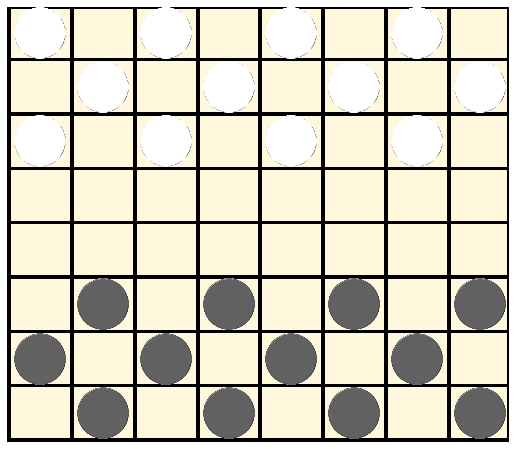

In [128]:
D = damas()
s = D.estado_inicial()
s = D.llenar(s)
D.pintar_estado(s)

### Ver movimientos

Es posible llevar que el juego funciona correctamente corriendo estas dos celdas iterativamente, la primera para las fichas blancas y la segunda para las fichas negras

#### Blancas

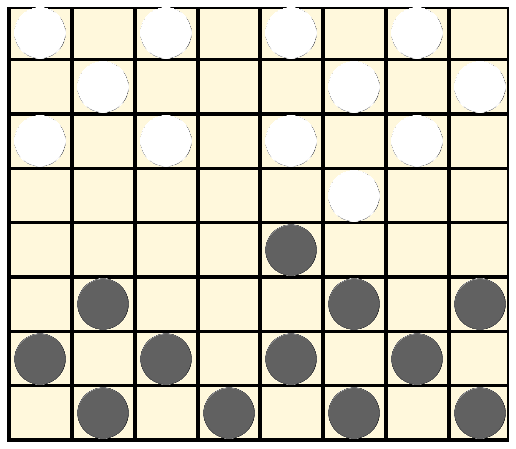

In [132]:
mov = D.acciones_aplicables(s)
ficha , movimientos_ficha = choice(list(mov.items()))
movimiento_ficha = choice(movimientos_ficha)
s = D.transicion(s,ficha,movimiento_ficha)
D.pintar_estado(s)

#### Negras

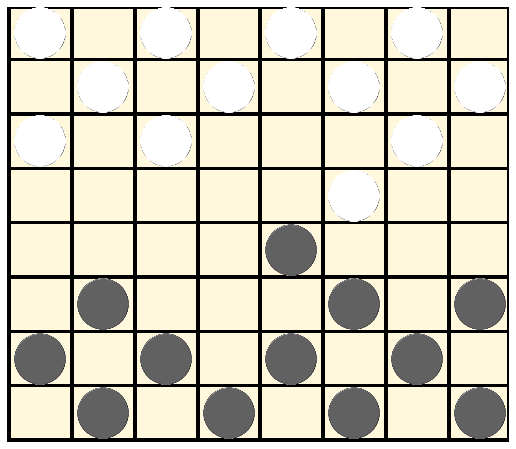

In [130]:
mov = D.acciones_aplicables(s)
ficha , movimientos_ficha = choice(list(mov.items()))
movimiento_ficha = choice(movimientos_ficha)
s = D.transicion(s,ficha,movimiento_ficha)
D.pintar_estado(s)

### Verificar funciona correctamente Test Objetivo

In [131]:
D.test_objetivo(s)

False

In [116]:
not movimientos_ficha

False